In [1]:
import scipy.stats
import pymc
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

ImportError: No module named pymc

In [6]:
data = scipy.stats.bernoulli.rvs(0.3, size=5000)
data

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
p_dist = pymc.Uniform("p_dist", lower=0., upper=1.)
bernoulli = pymc.Bernoulli("bernoulli", p=p_dist, observed=True, value=data) 
#wichtig: uniform_prior inserted in bernoulli function so that the outcome of the bernoulli trial depends on the prior
#observed=True so that data can be passed to the function
model = pymc.Model([p_dist, bernoulli])
#now we can sample from the model
mcmc = pymc.MCMC(model)
mcmc.sample(iter=1000000, burn=10000)

 [-----------------100%-----------------] 1000000 of 1000000 complete in 169.5 sec

(0.0, 1.0)

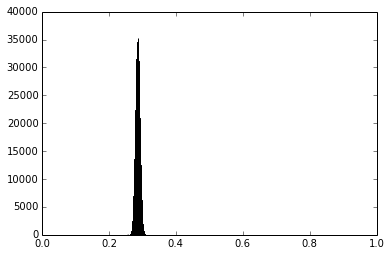

In [8]:
p_trace = mcmc.trace('p_dist')[:]
plt.hist(p_trace, bins=100)
plt.xlim((0.,1.))